# Initialization

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

Pandas version: 0.20.1
Numpy version: 1.12.1


In [2]:
import dateutil

from datetime import *

# Challenge 1

Combine multiple weeks of data into a single dataframe

In [3]:
"""
Simply reading all the files into individual dataframes and then 'concatenating
them into one big dataframe
"""

df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160507.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160514.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160521.txt')
df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt')

dfb = pd.concat([df1,df2,df3,df4],ignore_index = True)

#This is the output
dfb

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427


In [4]:
#The original file has a long emptyspace in the 'EXIT              '  label. Rename columns to fix this 
dfb.columns= ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME','DESC', 'ENTRIES','EXITS']

# Challenge 2

Create a new column, **date_time** which takes the Date and Time strings and converts them into a datetime object.

In [5]:
#Conversion from two string objects to a datetime object
dfb['date_time'] = pd.to_datetime(dfb['DATE']+' '+dfb['TIME'],infer_datetime_format=True)
dfb.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30 16:00:00


In [6]:
#Proof that we now have a new date_time columns
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777938 entries, 0 to 777937
Data columns (total 12 columns):
C/A          777938 non-null object
UNIT         777938 non-null object
SCP          777938 non-null object
STATION      777938 non-null object
LINENAME     777938 non-null object
DIVISION     777938 non-null object
DATE         777938 non-null object
TIME         777938 non-null object
DESC         777938 non-null object
ENTRIES      777938 non-null int64
EXITS        777938 non-null int64
date_time    777938 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 71.2+ MB


# Challenge 3

We want total daily entries by "unique turnstile units" in the dataset.
Exploring the dataset documentation, we found that in order to
**to uniquely identify a Turnstile, we need both the 'C/A' and the 'SCP'**
because in some cases, the same SCP number is present at multiple different stations.

**Similarly, to uniquely identify a station, we need both a 'STATION' and 'LINENAME'**
This is because some stations share the same name but service different lines.

In [7]:
"""
First, we shall create a new coulmn for a unique turnstile ID and another for unique Station ID
and then sort by Station ID, Turnstile and Date_time
"""

dfb['Turnstile'] = dfb['C/A']+' '+dfb['SCP']
dfb['Station_ID'] = dfb['STATION']+' '+dfb['LINENAME']
dfb = dfb.sort_values(['Station_ID','Turnstile','date_time'])

dfb.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,Turnstile,Station_ID
29818,H007,R248,00-00-00,1 AV,L,BMT,04/30/2016,00:00:00,REGULAR,11020304,12018000,2016-04-30 00:00:00,H007 00-00-00,1 AV L
29819,H007,R248,00-00-00,1 AV,L,BMT,04/30/2016,04:00:00,REGULAR,11020477,12018248,2016-04-30 04:00:00,H007 00-00-00,1 AV L
29820,H007,R248,00-00-00,1 AV,L,BMT,04/30/2016,08:00:00,REGULAR,11020584,12018501,2016-04-30 08:00:00,H007 00-00-00,1 AV L
29821,H007,R248,00-00-00,1 AV,L,BMT,04/30/2016,12:00:00,REGULAR,11021142,12019226,2016-04-30 12:00:00,H007 00-00-00,1 AV L
29822,H007,R248,00-00-00,1 AV,L,BMT,04/30/2016,16:00:00,REGULAR,11022115,12020133,2016-04-30 16:00:00,H007 00-00-00,1 AV L
29823,H007,R248,00-00-00,1 AV,L,BMT,04/30/2016,20:00:00,REGULAR,11022940,12021292,2016-04-30 20:00:00,H007 00-00-00,1 AV L
29824,H007,R248,00-00-00,1 AV,L,BMT,05/01/2016,00:00:00,REGULAR,11023576,12022156,2016-05-01 00:00:00,H007 00-00-00,1 AV L
29825,H007,R248,00-00-00,1 AV,L,BMT,05/01/2016,04:00:00,REGULAR,11023725,12022550,2016-05-01 04:00:00,H007 00-00-00,1 AV L
29826,H007,R248,00-00-00,1 AV,L,BMT,05/01/2016,08:00:00,REGULAR,11023794,12022738,2016-05-01 08:00:00,H007 00-00-00,1 AV L
29827,H007,R248,00-00-00,1 AV,L,BMT,05/01/2016,12:00:00,REGULAR,11024329,12023243,2016-05-01 12:00:00,H007 00-00-00,1 AV L


In [8]:
#Calculating the unique new entries in a day.
# Method1 : First grouping the maximum and minumum number of entries and then calculating
#the difference between the two
uniq_ent_by_day = dfb.groupby(['Station_ID','Turnstile','DATE'],sort=False)['ENTRIES'].max()-dfb.groupby(['Station_ID','Turnstile','DATE'],sort=False)['ENTRIES'].min()
uniq_ent_by_day = uniq_ent_by_day.reset_index()
uniq_ent_by_day.columns = ['Station_ID','Turnstile','DATE','New_Entries']

uniq_ent_by_day


,Station_ID,Turnstile,DATE,New_Entries
0,1 AV L,H007 00-00-00,04/30/2016,2636
1,1 AV L,H007 00-00-00,05/01/2016,2084
2,1 AV L,H007 00-00-00,05/02/2016,4156
3,1 AV L,H007 00-00-00,05/03/2016,4153
4,1 AV L,H007 00-00-00,05/04/2016,4256
5,1 AV L,H007 00-00-00,05/05/2016,4217
6,1 AV L,H007 00-00-00,05/06/2016,4063
7,1 AV L,H007 00-00-00,05/07/2016,2629
8,1 AV L,H007 00-00-00,05/08/2016,1786
9,1 AV L,H007 00-00-00,05/09/2016,3698


In [11]:
#Sort values by ID and Date
uniq_ent_by_day.sort_values(['Turnstile','DATE'],inplace=True)
uniq_ent_by_day.reset_index(inplace=True)
uniq_ent_by_day.drop('index', axis =1 , inplace=True)

uniq_ent_by_day

,Station_ID,Turnstile,DATE,New_Entries
0,59 ST NQR456,A002 02-00-00,04/30/2016,861
1,59 ST NQR456,A002 02-00-00,05/01/2016,623
2,59 ST NQR456,A002 02-00-00,05/02/2016,1463
3,59 ST NQR456,A002 02-00-00,05/03/2016,1471
4,59 ST NQR456,A002 02-00-00,05/04/2016,1532
5,59 ST NQR456,A002 02-00-00,05/05/2016,1431
6,59 ST NQR456,A002 02-00-00,05/06/2016,1554
7,59 ST NQR456,A002 02-00-00,05/07/2016,811
8,59 ST NQR456,A002 02-00-00,05/08/2016,563
9,59 ST NQR456,A002 02-00-00,05/09/2016,1461


## Challenge 3 Outliers treatment


Sorting by number of new entries quickly reveals that we have
some outrageous new_entries counts. This is striking because a quick
google search reveals that the daily ridership of the MTA is about 5.7 million/day.
So it is implausible that there would truly be almost 2 billion New Entries each day.


In [12]:
uniq_ent_by_day.sort_values(['New_Entries'], ascending=False).head(10)

,Station_ID,Turnstile,DATE,New_Entries
33384,34 ST-PENN STA ACE,N067 00-03-00,05/03/2016,1961790095
60717,47-50 STS ROCK BDFM,N501 01-03-02,05/04/2016,1906773309
7327,CANAL ST JNQRZ6,A066 00-00-00,05/20/2016,1717967591
98633,GRD CNTRL-42 ST 4567S,R238A 02-00-03,05/23/2016,1609770862
96444,28 ST 6,R228 00-00-01,05/11/2016,1424901417
7382,CANAL ST JNQRZ6,A066 00-00-02,05/21/2016,317508016
51147,36 ST MR,N312 00-06-00,05/26/2016,302009169
51138,36 ST MR,N312 00-06-00,05/17/2016,301953610
125458,BEVERLY RD 25,R641 00-06-00,05/15/2016,300787376
33583,34 ST-PENN STA ACE,N067 00-06-00,05/06/2016,150995721


One way to approach this is by looking to see how these extreme values compare with the median daily ridership.

I decided to try creating a new dataframe that holds the median daily **New_entries by Station_ID** and then
compare it to **daily New_entries by Turnstile**.

In [13]:
median_values_by_stat_ID = uniq_ent_by_day.groupby(['Station_ID',"DATE"]).sum()
median_values_by_stat_ID = median_values_by_stat_ID.groupby(['Station_ID']).median()
median_values_by_stat_ID = median_values_by_stat_ID.reset_index()
#median_values_by_stat_ID.sort_values(['New_Entries'],ascending=False)

median_values_by_stat_ID.columns = ['Station_ID', 'Median_daily_station_entries']
median_values_by_stat_ID.sort_values(['Median_daily_station_entries'],ascending=False).head(12)

,Station_ID,Median_daily_station_entries
309,GRD CNTRL-42 ST 4567S,142978.0
90,34 ST-HERALD SQ BDFMNQR,108483.5
103,42 ST-PORT AUTH ACENQRS1237,82435.0
94,34 ST-PENN STA ACE,76131.5
442,TIMES SQ-42 ST 1237ACENQRS,69073.5
28,14 ST-UNION SQ LNQR456,63389.5
156,86 ST 456,61103.0
286,FLUSHING-MAIN 7,57262.5
107,47-50 STS ROCK BDFM,54839.5
93,34 ST-PENN STA 123ACE,52386.0


In [14]:
df_merged_uniq_median = uniq_ent_by_day.merge(median_values_by_stat_ID)
df_merged_uniq_median.head(6)

,Station_ID,Turnstile,DATE,New_Entries,Median_daily_station_entries
0,59 ST NQR456,A002 02-00-00,04/30/2016,861,15033.5
1,59 ST NQR456,A002 02-00-00,05/01/2016,623,15033.5
2,59 ST NQR456,A002 02-00-00,05/02/2016,1463,15033.5
3,59 ST NQR456,A002 02-00-00,05/03/2016,1471,15033.5
4,59 ST NQR456,A002 02-00-00,05/04/2016,1532,15033.5
5,59 ST NQR456,A002 02-00-00,05/05/2016,1431,15033.5


Now once again, I'd like to sort by greatest new_entries per day

In [15]:
df_merged_uniq_median.sort_values(['New_Entries'], ascending=False).head(8)

,Station_ID,Turnstile,DATE,New_Entries,Median_daily_station_entries
35764,34 ST-PENN STA ACE,N067 00-03-00,05/03/2016,1961790095,76131.5
63657,47-50 STS ROCK BDFM,N501 01-03-02,05/04/2016,1906773309,54839.5
6319,CANAL ST JNQRZ6,A066 00-00-00,05/20/2016,1717967591,40812.5
99081,GRD CNTRL-42 ST 4567S,R238A 02-00-03,05/23/2016,1609770862,142978.0
96892,28 ST 6,R228 00-00-01,05/11/2016,1424901417,22298.0
6374,CANAL ST JNQRZ6,A066 00-00-02,05/21/2016,317508016,40812.5
54087,36 ST MR,N312 00-06-00,05/26/2016,302009169,4687.0
54078,36 ST MR,N312 00-06-00,05/17/2016,301953610,4687.0


Looks like some of those New_Entries per turnstile are highly unusual compared to the
median daily entries for the entire station.
So, I'm going to filter out all New_Entries that are 3 or more times greater than the Median_daily_station_entries.

In [16]:
filt_uniq_new_entries = df_merged_uniq_median[df_merged_uniq_median['New_Entries'] < 3*df_merged_uniq_median['Median_daily_station_entries']]
filt_uniq_new_entries.sort_values(['New_Entries'],ascending=False)

,Station_ID,Turnstile,DATE,New_Entries,Median_daily_station_entries
75960,PATH WTC 1,PTH08 00-00-01,05/26/2016,66587,37293.0
75194,PAVONIA/NEWPORT 1,PTH06 00-00-06,05/13/2016,49217,18806.5
73977,GROVE STREET 1,PTH04 00-01-00,05/19/2016,24637,19096.5
73978,GROVE STREET 1,PTH04 00-01-00,05/20/2016,23618,19096.5
74668,EXCHANGE PLACE 1,PTH05 00-01-05,05/18/2016,12869,17023.5
77302,14TH STREET 1,PTH11 00-04-02,05/26/2016,11540,8641.0
72058,JAMAICA CENTER EJZ,N606 00-00-08,05/26/2016,8797,41585.0
98832,GRD CNTRL-42 ST 4567S,R238 00-03-01,05/26/2016,8786,142978.0
98776,GRD CNTRL-42 ST 4567S,R238 00-00-09,05/26/2016,8223,142978.0
72043,JAMAICA CENTER EJZ,N606 00-00-08,05/11/2016,8061,41585.0


# Challenge 4



We will plot the daily time series for a turnstile.

**But first, we will attempt to clean up the data** to look at entries in a specific range of times [needed for my project]
This section will show a more robust method of tackling outliers.

Over here, I will be creating a seperate column with Date and Time as a time object. I will then filter
to look for entries between 12pm and 9pm inclusive.
For Project Benson, I wanted to target people in the late-afternoons and evenings after they get off from work.

In [17]:
#Creating separate date/time columns
dfb['Date_act'] = pd.DatetimeIndex(dfb['date_time']).date
dfb['Time_act'] = pd.DatetimeIndex(dfb['date_time']).time
dfb

#Filtering for rows matching times within a [12pm,9pm] interval
df2 = dfb[dfb['Time_act']>= time(hour=12,minute=0,second=0)]
df2 = df2[df2['Time_act']<= time(hour=21,minute=0,second=0)]

#Finding the maximum and minimum times on each day within the time constraints listed above
df3 = df2.groupby(['Station_ID','Turnstile','Date_act'],sort=False)['Time_act'].min()
df4 = df2.groupby(['Station_ID','Turnstile','Date_act'],sort=False)['Time_act'].max()
df3=df3.reset_index()
df4 = df4.reset_index()

#Compiling a master dataframe object that is has a row for each unique [Station_ID,Date] pair containing the
#initial value of the entry counter, the final value of the entry counter. And then cleaning it up.

df3 = df3.merge(dfb)
df4 = df4.merge(dfb)
df5 = df3.merge(df4,on=['Station_ID','Turnstile',"Date_act",'C/A','SCP','DIVISION','DATE','UNIT','LINENAME','DESC','STATION'])
df5a = df5.drop(['C/A','STATION','LINENAME','TIME_x','TIME_y','DESC','UNIT','EXITS_x','EXITS_y','DATE','date_time_x','date_time_y','DIVISION'],axis=1)

In [18]:
#Filtering out values that have a higher early afternoon entry count than evening entry count,
#and then calculating the unique entries during that period
df6a = df5a[df5a['ENTRIES_x']<df5a['ENTRIES_y']]
df6a['New_Entries'] = df6a['ENTRIES_y']-df6a['ENTRIES_x']
df6a.sample(n=10)

/home/farhaan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Station_ID,Turnstile,Date_act,Time_act_x,SCP,ENTRIES_x,Time_act_y,ENTRIES_y,New_Entries
122641,W 4 ST-WASH SQ ABCDEFM,N080 00-00-02,2016-05-01,13:00:00,00-00-02,762370,21:00:00,762904,534
103194,MYRTLE-WILLOUGH G,N416 01-06-01,2016-04-30,13:00:00,01-06-01,4928742,21:00:00,4929351,609
38890,66 ST-LINCOLN 1,R160 02-03-00,2016-05-16,13:00:00,02-03-00,2904190,21:00:00,2905916,1726
40381,7 AV BQ,B004 00-00-00,2016-05-24,13:00:00,00-00-00,4207674,21:00:00,4208712,1038
90068,HUNTS POINT AV 6,R412 00-03-02,2016-05-01,13:00:00,00-03-02,1468404,21:00:00,1468656,252
102859,MT EDEN AV 4,R285 00-00-01,2016-05-25,12:00:00,00-00-01,3627908,20:00:00,3628802,894
85257,GRD CNTRL-42 ST 4567S,R238 00-00-06,2016-05-19,12:00:00,00-00-06,16787948,20:00:00,16790044,2096
44860,86 ST 1,R165 01-00-00,2016-05-21,13:00:00,01-00-00,7119004,21:00:00,7119344,340
122334,VERNON-JACKSON 7,R503 01-06-01,2016-05-02,12:00:00,01-06-01,117370,20:00:00,117464,94
102672,MOSHOLU PKWY 4,R293 00-00-04,2016-05-06,13:00:00,00-00-04,4014963,21:00:00,4015508,545


In [19]:
df6a.sort_values(['New_Entries'], ascending=False)

,Station_ID,Turnstile,Date_act,Time_act_x,SCP,ENTRIES_x,Time_act_y,ENTRIES_y,New_Entries
29682,47-50 STS ROCK BDFM,N501 01-03-02,2016-05-04,12:00:00,01-03-02,15063819,20:00:00,1921836817,1906772998
25904,36 ST MR,N312 00-06-00,2016-05-17,13:00:00,00-06-00,16846603,21:00:00,318800132,301953529
24184,34 ST-PENN STA ACE,N067 00-06-00,2016-05-01,12:00:00,00-06-00,232564,20:00:00,150997852,150765288
123022,W 4 ST-WASH SQ ABCDEFM,N083 01-05-00,2016-05-19,13:00:00,01-05-00,4226,21:00:00,117440513,117436287
29443,47-50 STS ROCK BDFM,N500 00-05-01,2016-05-16,12:00:00,00-05-01,0,20:00:00,67108864,67108864
113047,RECTOR ST 1,R103 00-06-00,2016-05-04,12:00:00,00-06-00,196815,20:00:00,67108933,66912118
126542,WORLD TRADE CTR ACE23,N094 01-00-00,2016-05-19,12:00:00,01-00-00,65005,20:00:00,1114445,1049440
85404,GRD CNTRL-42 ST 4567S,R238 00-03-01,2016-05-26,12:00:00,00-03-01,12609571,20:00:00,12615605,6034
85412,GRD CNTRL-42 ST 4567S,R238 00-03-02,2016-05-06,12:00:00,00-03-02,6865205,20:00:00,6870669,5464
85416,GRD CNTRL-42 ST 4567S,R238 00-03-02,2016-05-10,12:00:00,00-03-02,6897197,20:00:00,6902618,5421


Looks like there are only 7 data points left that have New_Entries > 7000
The next largest data point is almost two orders of magnitude greater!
So, let's filter out New_entries with values larger than 7000

In [20]:
daily_afternoon_entries = df6a[df6a['New_Entries']<7000]

## We can finally get to plotting!

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

Based on the fact that our *Date_parsed* **daily_afternoon_entries['Date_act']** is rendered as a non-null object, we should convert it to a datetime object so that it can be used in our lineplots.
We are now plotting the monthly ridership of a few turnstiles.

/home/farhaan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


N342 01-00-03
N305 01-03-01
PTH11 00-00-02


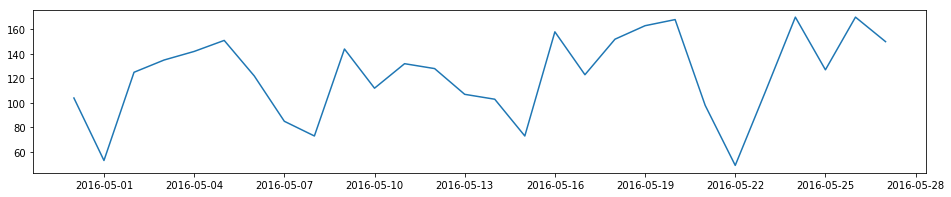

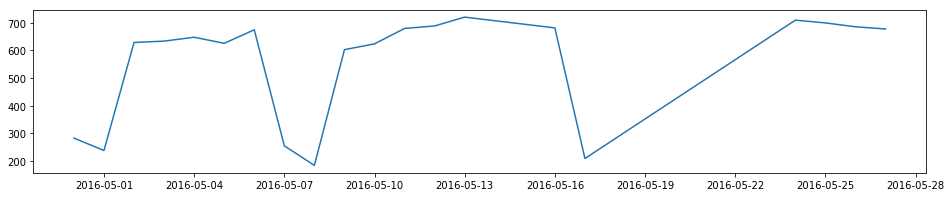

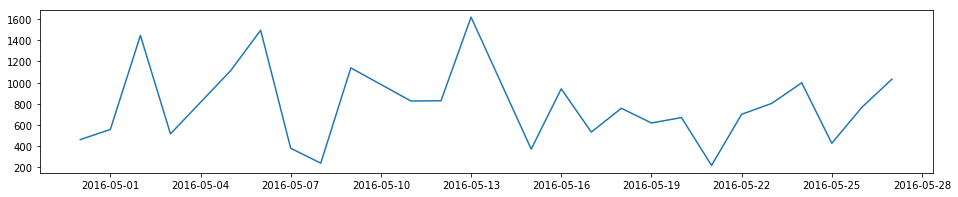

In [32]:
daily_afternoon_entries['Date_act'] = pd.to_datetime(daily_afternoon_entries['Date_act'])

def plot_chal4(turnstile_list):
    names_list = []
    dates_list =[]
    counts_list = []
    for turnstile in turnstile_list:
        dates = []
        counts = []
        name = turnstile
        t1 = daily_afternoon_entries[['Turnstile','Date_act','New_Entries']]
        t1 = t1[t1['Turnstile']==turnstile]
        names_list.append(name)
        dates_list.append(pd.Series(t1['Date_act']))
        counts_list.append(pd.Series(t1['New_Entries']))
    for name,dates,counts in zip(names_list,dates_list,counts_list):
        plt.figure(figsize=(16,3))
        print(name);
        plt.plot(dates,counts)

#This function returns a randomly generated list of turnstiles based on how many we want        
def sample_turnstile_list(desired_count):
    """
    Returns a list containing x random turnstiles
    """
    sample_turnstile_list = list(pd.Series(daily_afternoon_entries['Turnstile'].unique()).sample(n=desired_count)) #['R258 00-06-02','N026 00-00-06', 'N510 02-06-01','R258 00-03-03']
    return sample_turnstile_list

desired_count = 3
plot_chal4(sample_turnstile_list(desired_count))


#Alternately:
#plot_chal4([custom_turnstile_list])
    


# Challenge 5

**Make a daily count of New_Entries at the CA/UNIT/STATION level"**
Because of the legwork done in Challenge 4, we can reuse the filtered dataframe that we created there and then Group by C/A, UNIT, and STATION.

In [33]:
#Making a copy of the filtered Data from Challenge 4 but keeping CA,UNIT,and STATION labels
df5b = df5.drop(['TIME_x','TIME_y','DESC','EXITS_x','EXITS_y','DATE','date_time_x','date_time_y'],axis=1)
df6b = df5b[df5b['ENTRIES_x']<df5b['ENTRIES_y']]
df6b['New_Entries'] = df6b['ENTRIES_y']-df6b['ENTRIES_x']
df6b = df6b[df6b['New_Entries']<7000]
df6b.sample(n=10)

/home/farhaan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Station_ID,Turnstile,Date_act,Time_act_x,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,ENTRIES_x,Time_act_y,ENTRIES_y,New_Entries
96302,KINGS HWY F,N558 01-06-01,2016-05-16,13:00:00,N558,R130,01-06-01,KINGS HWY,F,IND,812372,21:00:00,812463,91
87564,HALSEY ST L,H030 01-00-02,2016-05-24,12:00:00,H030,R266,01-00-02,HALSEY ST,L,BMT,2676704,20:00:00,2676925,221
85587,GRD CNTRL-42 ST 4567S,R238A 02-00-01,2016-05-13,12:00:00,R238A,R046,02-00-01,GRD CNTRL-42 ST,4567S,IRT,1393983,20:00:00,1394996,1013
17952,28 ST 1,R133 00-00-01,2016-05-11,13:00:00,R133,R272,00-00-01,28 ST,1,IRT,3362393,21:00:00,3364321,1928
30052,47-50 STS ROCK BDFM,N501A 02-06-01,2016-05-10,12:00:00,N501A,R020,02-06-01,47-50 STS ROCK,BDFM,IND,3198676,20:00:00,3199152,476
42111,77 ST 6,R247 01-00-02,2016-05-02,13:00:00,R247,R178,01-00-02,77 ST,6,IRT,100302,21:00:00,101071,769
4309,135 ST BC,N022 02-06-00,2016-05-12,13:00:00,N022,R332,02-06-00,135 ST,BC,IND,67317932,21:00:00,67318276,344
53393,BAY RIDGE AV R,C023 00-00-02,2016-05-11,12:00:00,C023,R213,00-00-02,BAY RIDGE AV,R,BMT,5929532,20:00:00,5929901,369
34343,57 ST F,N600 00-00-03,2016-05-03,13:00:00,N600,R302,00-00-03,57 ST,F,IND,6777987,21:00:00,6778882,895
60865,BUHRE AV 6,R422 00-00-00,2016-05-22,13:00:00,R422,R428,00-00-00,BUHRE AV,6,IRT,226529,21:00:00,226616,87


In [36]:
#Grouping by C/A, UNIT, and STATION
new_entries_grouped_by_ca_unit_station = df6b.groupby(['C/A','UNIT','STATION','Date_act'])['New_Entries'].sum()
new_entries_grouped_by_ca_unit_station = new_entries_grouped_by_ca_unit_station.reset_index()
new_entries_grouped_by_ca_unit_station.sort_values(['New_Entries'],ascending=False)

,C/A,UNIT,STATION,Date_act,New_Entries
15090,R238,R046,GRD CNTRL-42 ST,2016-05-13,34591
15094,R238,R046,GRD CNTRL-42 ST,2016-05-17,34577
15083,R238,R046,GRD CNTRL-42 ST,2016-05-06,33771
15081,R238,R046,GRD CNTRL-42 ST,2016-05-04,33046
15097,R238,R046,GRD CNTRL-42 ST,2016-05-20,32864
15096,R238,R046,GRD CNTRL-42 ST,2016-05-19,32512
15101,R238,R046,GRD CNTRL-42 ST,2016-05-24,32300
15080,R238,R046,GRD CNTRL-42 ST,2016-05-03,32270
15095,R238,R046,GRD CNTRL-42 ST,2016-05-18,32214
15082,R238,R046,GRD CNTRL-42 ST,2016-05-05,32057


# Challenge 6

We can now plot the daily ridership for any specified C/A,UNIT,STATION combo.

In the example below, we are graphing the daily counts for:
1. C/A:  R238 Unit:  R046 Station:  GRD CNTRL-42 ST
2. C/A:  N100 Unit:  R252 Station:  HIGH ST
3. C/A:  H033 Unit:  R313 Station:  BUSHWICK AV

C/A:  R238 Unit:  R046 Station:  GRD CNTRL-42 ST
C/A:  N100 Unit:  R252 Station:  HIGH ST
C/A:  H033 Unit:  R313 Station:  BUSHWICK AV


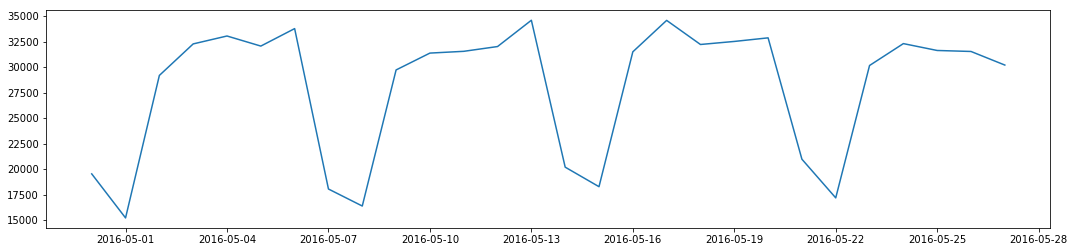

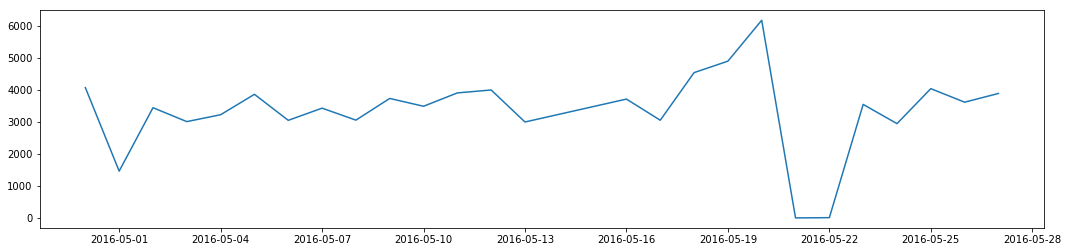

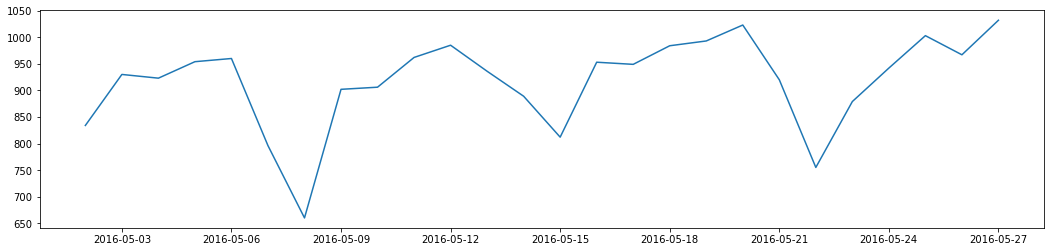

In [37]:
def plot_chal6(ca_unit_station_combo):
    t1 = new_entries_grouped_by_ca_unit_station[['C/A','UNIT','STATION','Date_act','New_Entries']]
    t1 = t1[t1['C/A']== ca_unit_station_combo[0]]
    t1 = t1[t1['UNIT']== ca_unit_station_combo[1]]
    t1 = t1[t1['STATION']==ca_unit_station_combo[2]]
    dates = pd.Series(t1['Date_act'])
    counts = pd.Series(t1['New_Entries'])
    plt.figure(figsize=(18,4))
    print("C/A: ",ca_unit_station_combo[0], "Unit: ",ca_unit_station_combo[1], "Station: ", ca_unit_station_combo[2]);
    plt.plot(dates,counts)

    
ch6_testcase_1 = ["R238","R046","GRD CNTRL-42 ST"]
ch6_testcase_2 = ["N100", "R252", "HIGH ST"]
ch6_testcase_3 = ["H033","R313","BUSHWICK AV"]

plot_chal6(ch6_testcase_1)
plot_chal6(ch6_testcase_2)
plot_chal6(ch6_testcase_3)

# Challenge 7

**Plot the ridership by weekday**

In [38]:
print(new_entries_grouped_by_ca_unit_station.info())
new_entries_grouped_by_ca_unit_station['Date_act'] = pd.DatetimeIndex(new_entries_grouped_by_ca_unit_station['Date_act'])
print(new_entries_grouped_by_ca_unit_station.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19783 entries, 0 to 19782
Data columns (total 5 columns):
C/A            19783 non-null object
UNIT           19783 non-null object
STATION        19783 non-null object
Date_act       19783 non-null object
New_Entries    19783 non-null int64
dtypes: int64(1), object(4)
memory usage: 772.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19783 entries, 0 to 19782
Data columns (total 5 columns):
C/A            19783 non-null object
UNIT           19783 non-null object
STATION        19783 non-null object
Date_act       19783 non-null datetime64[ns]
New_Entries    19783 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 772.9+ KB
None


In [39]:
new_entries_grouped_by_ca_unit_station['Day_of_Week']= pd.DatetimeIndex(new_entries_grouped_by_ca_unit_station['Date_act']).weekday
new_entries_grouped_by_ca_unit_station


days_of_week = pd.DataFrame({
    'Day_of_Week' : [0,1,2,3,4,5,6],
    'Day_of_week_2' :['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday']
})


weeks_of_data = 4
avg_ridership_by_weekday = new_entries_grouped_by_ca_unit_station.groupby(['C/A','UNIT','STATION','Day_of_Week'],as_index=False).sum()
avg_ridership_by_weekday['Average_weekday_entries'] = avg_ridership_by_weekday['New_Entries']/weeks_of_data
avg_ridership_by_weekday = avg_ridership_by_weekday.merge(days_of_week)
avg_ridership_by_weekday

,C/A,UNIT,STATION,Day_of_Week,New_Entries,Average_weekday_entries,Day_of_week_2
0,A002,R051,59 ST,0,41943,10485.75,Monday
1,A006,R079,5 AV/59 ST,0,23605,5901.25,Monday
2,A007,R079,5 AV/59 ST,0,8600,2150.00,Monday
3,A010,R080,57 ST-7 AV,0,44348,11087.00,Monday
4,A011,R080,57 ST-7 AV,0,14144,3536.00,Monday
5,A013,R081,49 ST,0,17138,4284.50,Monday
6,A014,R081,49 ST,0,9919,2479.75,Monday
7,A015,R081,49 ST,0,25716,6429.00,Monday
8,A016,R081,49 ST,0,12561,3140.25,Monday
9,A021,R032,TIMES SQ-42 ST,0,36399,9099.75,Monday


Now let's plot a bar graph for average entries by weekday for a given station


C/A:  R238 Unit:  R046 Station:  GRD CNTRL-42 ST


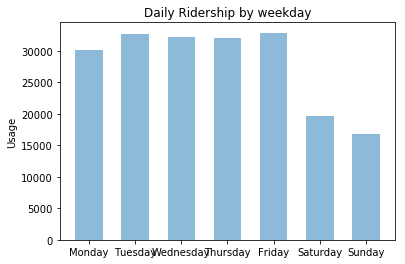

C/A:  N100 Unit:  R252 Station:  HIGH ST


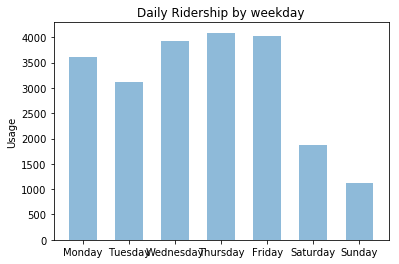

C/A:  H033 Unit:  R313 Station:  BUSHWICK AV


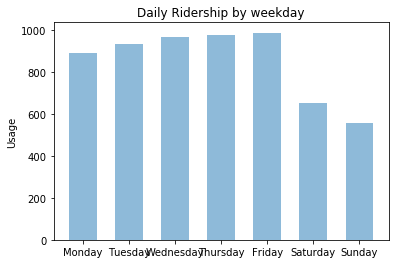

In [41]:
def plot_chal7(ca_unit_station_combo):
    t1 = avg_ridership_by_weekday[['C/A','UNIT','STATION','Day_of_week_2','Average_weekday_entries']]
    t1 = t1[t1['C/A']== ca_unit_station_combo[0]]
    t1 = t1[t1['UNIT']== ca_unit_station_combo[1]]
    t1 = t1[t1['STATION']==ca_unit_station_combo[2]]
    days = pd.Series(t1['Day_of_week_2'])
    avg_weekly_entries = pd.Series(t1['Average_weekday_entries'])
    print("C/A: ",ca_unit_station_combo[0], "Unit: ",ca_unit_station_combo[1], "Station: ", ca_unit_station_combo[2]);
    #objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
    y_pos = np.arange(len(days))
    plt.bar(y_pos, avg_weekly_entries, align='center', alpha=0.5, width=.6)
    plt.xticks(y_pos, list(days_of_week['Day_of_week_2']))
    plt.ylabel('Usage')
    plt.title('Daily Ridership by weekday')
    plt.show()
    
ch7_testcase_1 = ["R238","R046","GRD CNTRL-42 ST"]
ch7_testcase_2 = ["N100", "R252", "HIGH ST"]
ch7_testcase_3 = ["H033","R313","BUSHWICK AV"]

plot_chal7(ch7_testcase_1)
plot_chal7(ch7_testcase_2)
plot_chal7(ch7_testcase_3)

# Challenge 8

**Find the stations with the highest ridership**

Let's split this process up by weekdays and weekends

## Weekday Average Ridership by station

In [42]:
weekday_station_agg = avg_ridership_by_weekday[avg_ridership_by_weekday['Day_of_Week']<5].groupby(['C/A','UNIT','STATION'],as_index=False)['Average_weekday_entries'].sum()
weekday_station_agg.sort_values(['Average_weekday_entries'],ascending=False,inplace=True)
weekday_station_agg.columns = ['C/A', 'UNIT', 'STATION', 'Average_weekly_entries']
weekday_station_agg.head(20)

,C/A,UNIT,STATION,Average_weekly_entries
552,R238,R046,GRD CNTRL-42 ST,159755.00
205,N051,R084,59 ST COLUMBUS,133789.75
567,R250,R179,86 ST,133346.25
563,R246,R177,68ST-HUNTER CO,124380.25
363,N500,R020,47-50 STS ROCK,123291.00
554,R240,R047,GRD CNTRL-42 ST,118832.00
233,N095,R014,FULTON ST,106528.00
370,N506,R022,34 ST-HERALD SQ,102865.25
537,R221,R170,14 ST-UNION SQ,96804.75
432,PTH08,R540,PATH WTC,95741.25


## Weekend Average Ridership by Station

In [44]:
weekend_station_agg = avg_ridership_by_weekday[avg_ridership_by_weekday['Day_of_Week']>=5].groupby(['C/A','UNIT','STATION'],as_index=False)['Average_weekday_entries'].sum()
weekend_station_agg.sort_values(['Average_weekday_entries'],ascending=False,inplace=True)
weekend_station_agg.columns = ['C/A', 'UNIT', 'STATION', 'Average_weekly_entries']
weekend_station_agg.head(20)

,C/A,UNIT,STATION,Average_weekly_entries
560,R250,R179,86 ST,36740.25
546,R238,R046,GRD CNTRL-42 ST,36432.75
370,N506,R022,34 ST-HERALD SQ,33215.00
121,H009,R235,BEDFORD AV,31457.50
671,R533,R055,FLUSHING-MAIN,29110.00
324,N324,R018,JKSN HT-ROOSVLT,26556.00
205,N051,R084,59 ST COLUMBUS,25525.75
115,H001,R175,8 AV,25309.50
533,R221,R170,14 ST-UNION SQ,25122.50
225,N083,R138,W 4 ST-WASH SQ,22427.50


# Challenge 9

**Now to plot our results:**

In [45]:
def plot_ch8(num_of_stations,agg_list):
    ca_unit_station_labels = [[agg_list['C/A'][i],
                               agg_list['UNIT'][i],
                               agg_list['STATION'][i]]
                              for i in range(num_of_stations)]
    station_names_list = pd.Series(ca_unit_station_labels)
    avg_weekly_entries_by_station = pd.Series(agg_list['Average_weekly_entries'].head(num_of_stations)/1000)
    y_pos = np.arange(len(station_names_list))
    plt.barh(y_pos, avg_weekly_entries_by_station, align='center', alpha=0.4)
    plt.yticks(y_pos, station_names_list)
    plt.xlabel('Daily ridership in thousands')
    plt.ylabel('Station Names')
    plt.title('Stations with most daily ridership')
    plt.show()

## Weekday Average Ridership by station

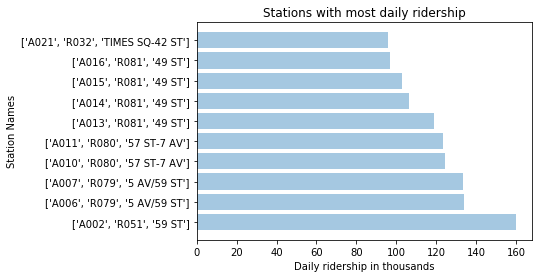

In [46]:
plot_ch8(10,weekday_station_agg)

## Weekend Average Ridership by Station

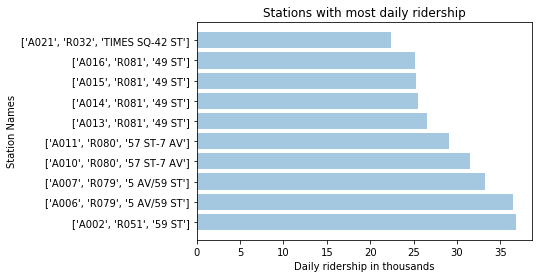

In [47]:
plot_ch8(10,weekend_station_agg)